# About Dataset

### Context

This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/

### Content

name: The English name of the Pokemon

japanese_name: The Original Japanese name of the Pokemon

pokedex_number: The entry number of the Pokemon in the National Pokedex

percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.

type1: The Primary Type of the Pokemon

type2: The Secondary Type of the Pokemon

classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex

height_m: Height of the Pokemon in metres

weight_kg: The Weight of the Pokemon in kilograms

capture_rate: Capture Rate of the Pokemon

base_egg_steps: The number of steps required to hatch an egg of the Pokemon

abilities: A stringified list of abilities that the Pokemon is capable of having

experience_growth: The Experience Growth of the Pokemon

base_happiness: Base Happiness of the Pokemon

against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type

hp: The Base HP of the Pokemon

attack: The Base Attack of the Pokemon

defense: The Base Defense of the Pokemon

sp_attack: The Base Special Attack of the Pokemon

sp_defense: The Base Special Defense of the Pokemon

speed: The Base Speed of the Pokemon

generation: The numbered generation which the Pokemon was first introduced

is_legendary: Denotes if the Pokemon is legendary.

### Acknowledgements

The data was scraped from http://serebii.net/.

### Inspiration

Pokemon holds a very special place in my heart as it is probably the only video game I have judiciously followed for more than 
10 years. 

With this dataset, I wanted to be able to answer the following questions:

Is it possible to build a classifier to identify legendary Pokemon?

How does height and weight of a Pokemon correlate with its various base stats?

What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?

Which type is the strongest overall? Which is the weakest?

Which type is the most likely to be a legendary Pokemon?

Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.

In [86]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [88]:
df.shape

(801, 41)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [90]:
nulls = df.isnull().sum()
nulls.sort_values()

abilities              0
generation             0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
hp                     0
japanese_name          0
name                   0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
attack                 0
against_water          0
base_egg_steps         0
against_rock           0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_steel          0
against_flying         0
against_fire           0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
is_legendary           0
weight_kg             20
height_m              20
percentage_male       98


In [91]:
df1 = df.copy()
df1

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


## Missing Values

In [ ]:
#fill missing values with avg  @ weight_kg
missing_value = df1['weight_kg'].mean()
df1['weight_kg'].fillna(missing_value, axis = 0, inplace = True)

In [94]:
#fill missing values with avg @ height_m
missing_value = df1['height_m'].mean()
df1['height_m'].fillna(missing_value, axis = 0, inplace = True)

In [119]:
#fill missing values with -1 for genderless @ percentage_male
df1['percentage_male'].fillna(-1, axis = 0, inplace = True)

In [126]:
#fill missing values with None for type2
df1['type2'].fillna('None', axis = 0, inplace = True)

In [127]:
df1.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [133]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.000000e+00,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.000000e+00,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.000000e+00,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.000000e+00,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.000000e+00,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.000000e+00,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.000000e+00,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.000000e+00,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.000000e+00,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.000000e+00,4.0


In [132]:
#Reorder name attribute
df1.insert(0, 'name', df1.pop('name'))

In [134]:
df1.head().T

,0,1,2,3,4
name,Bulbasaur,Ivysaur,Venusaur,Charmander,Charmeleon
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
against_bug,1.0,1.0,1.0,0.5,0.5
against_dark,1.0,1.0,1.0,1.0,1.0
against_dragon,1.0,1.0,1.0,1.0,1.0
against_electric,0.5,0.5,0.5,1.0,1.0
against_fairy,0.5,0.5,0.5,0.5,0.5
against_fight,0.5,0.5,0.5,1.0,1.0
against_fire,2.0,2.0,2.0,0.5,0.5
against_flying,2.0,2.0,2.0,1.0,1.0


## capture_rate data type

In [139]:
for i in df.capture_rate:
    print(i, end = ', ')

45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 120, 45, 255, 120, 45, 255, 120, 45, 255, 127, 255, 90, 255, 90, 190, 75, 255, 90, 235, 120, 45, 235, 120, 45, 150, 25, 190, 75, 170, 50, 255, 90, 255, 120, 45, 190, 75, 190, 75, 255, 50, 255, 90, 190, 75, 190, 75, 190, 75, 255, 120, 45, 200, 100, 50, 180, 90, 45, 255, 120, 45, 190, 60, 255, 120, 45, 190, 60, 190, 75, 190, 60, 45, 190, 45, 190, 75, 190, 75, 190, 60, 190, 90, 45, 45, 190, 75, 225, 60, 190, 60, 90, 45, 190, 75, 45, 45, 45, 190, 60, 120, 60, 30, 45, 45, 225, 75, 225, 60, 225, 60, 45, 45, 45, 45, 45, 45, 45, 255, 45, 45, 35, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 3, 3, 3, 45, 45, 45, 3, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 90, 255, 90, 255, 90, 255, 90, 90, 190, 75, 190, 150, 170, 190, 75, 190, 75, 235, 120, 45, 45, 190, 75, 65, 45, 255, 120, 45, 45, 235, 120, 75, 255, 90, 45, 45, 30, 70, 45, 225, 45, 60, 190, 75, 190, 60, 25, 190, 75, 45, 25, 190, 45, 60, 120, 60, 190, 75, 225, 75, 60, 190, 75, 45, 25, 25, 120, 45, 45,

In [140]:
#check 
df1[df1["capture_rate"]=="30 (Meteorite)255 (Core)"]

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,Minior,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,...,55.155761,774,100,60,120,rock,flying,40.0,7,0


In [141]:
# replace value with integer 
df1["capture_rate"].replace({"30 (Meteorite)255 (Core)": '30'}, inplace = True)


In [142]:
#check again
df1[df1["capture_rate"]=="30 (Meteorite)255 (Core)"]

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary


In [144]:
# converting into integer type attribute
df1["capture_rate"] = df1["capture_rate"].astype('int')
df1["capture_rate"].dtype

dtype('int32')

## Visualization

### 1. Correlation matrices

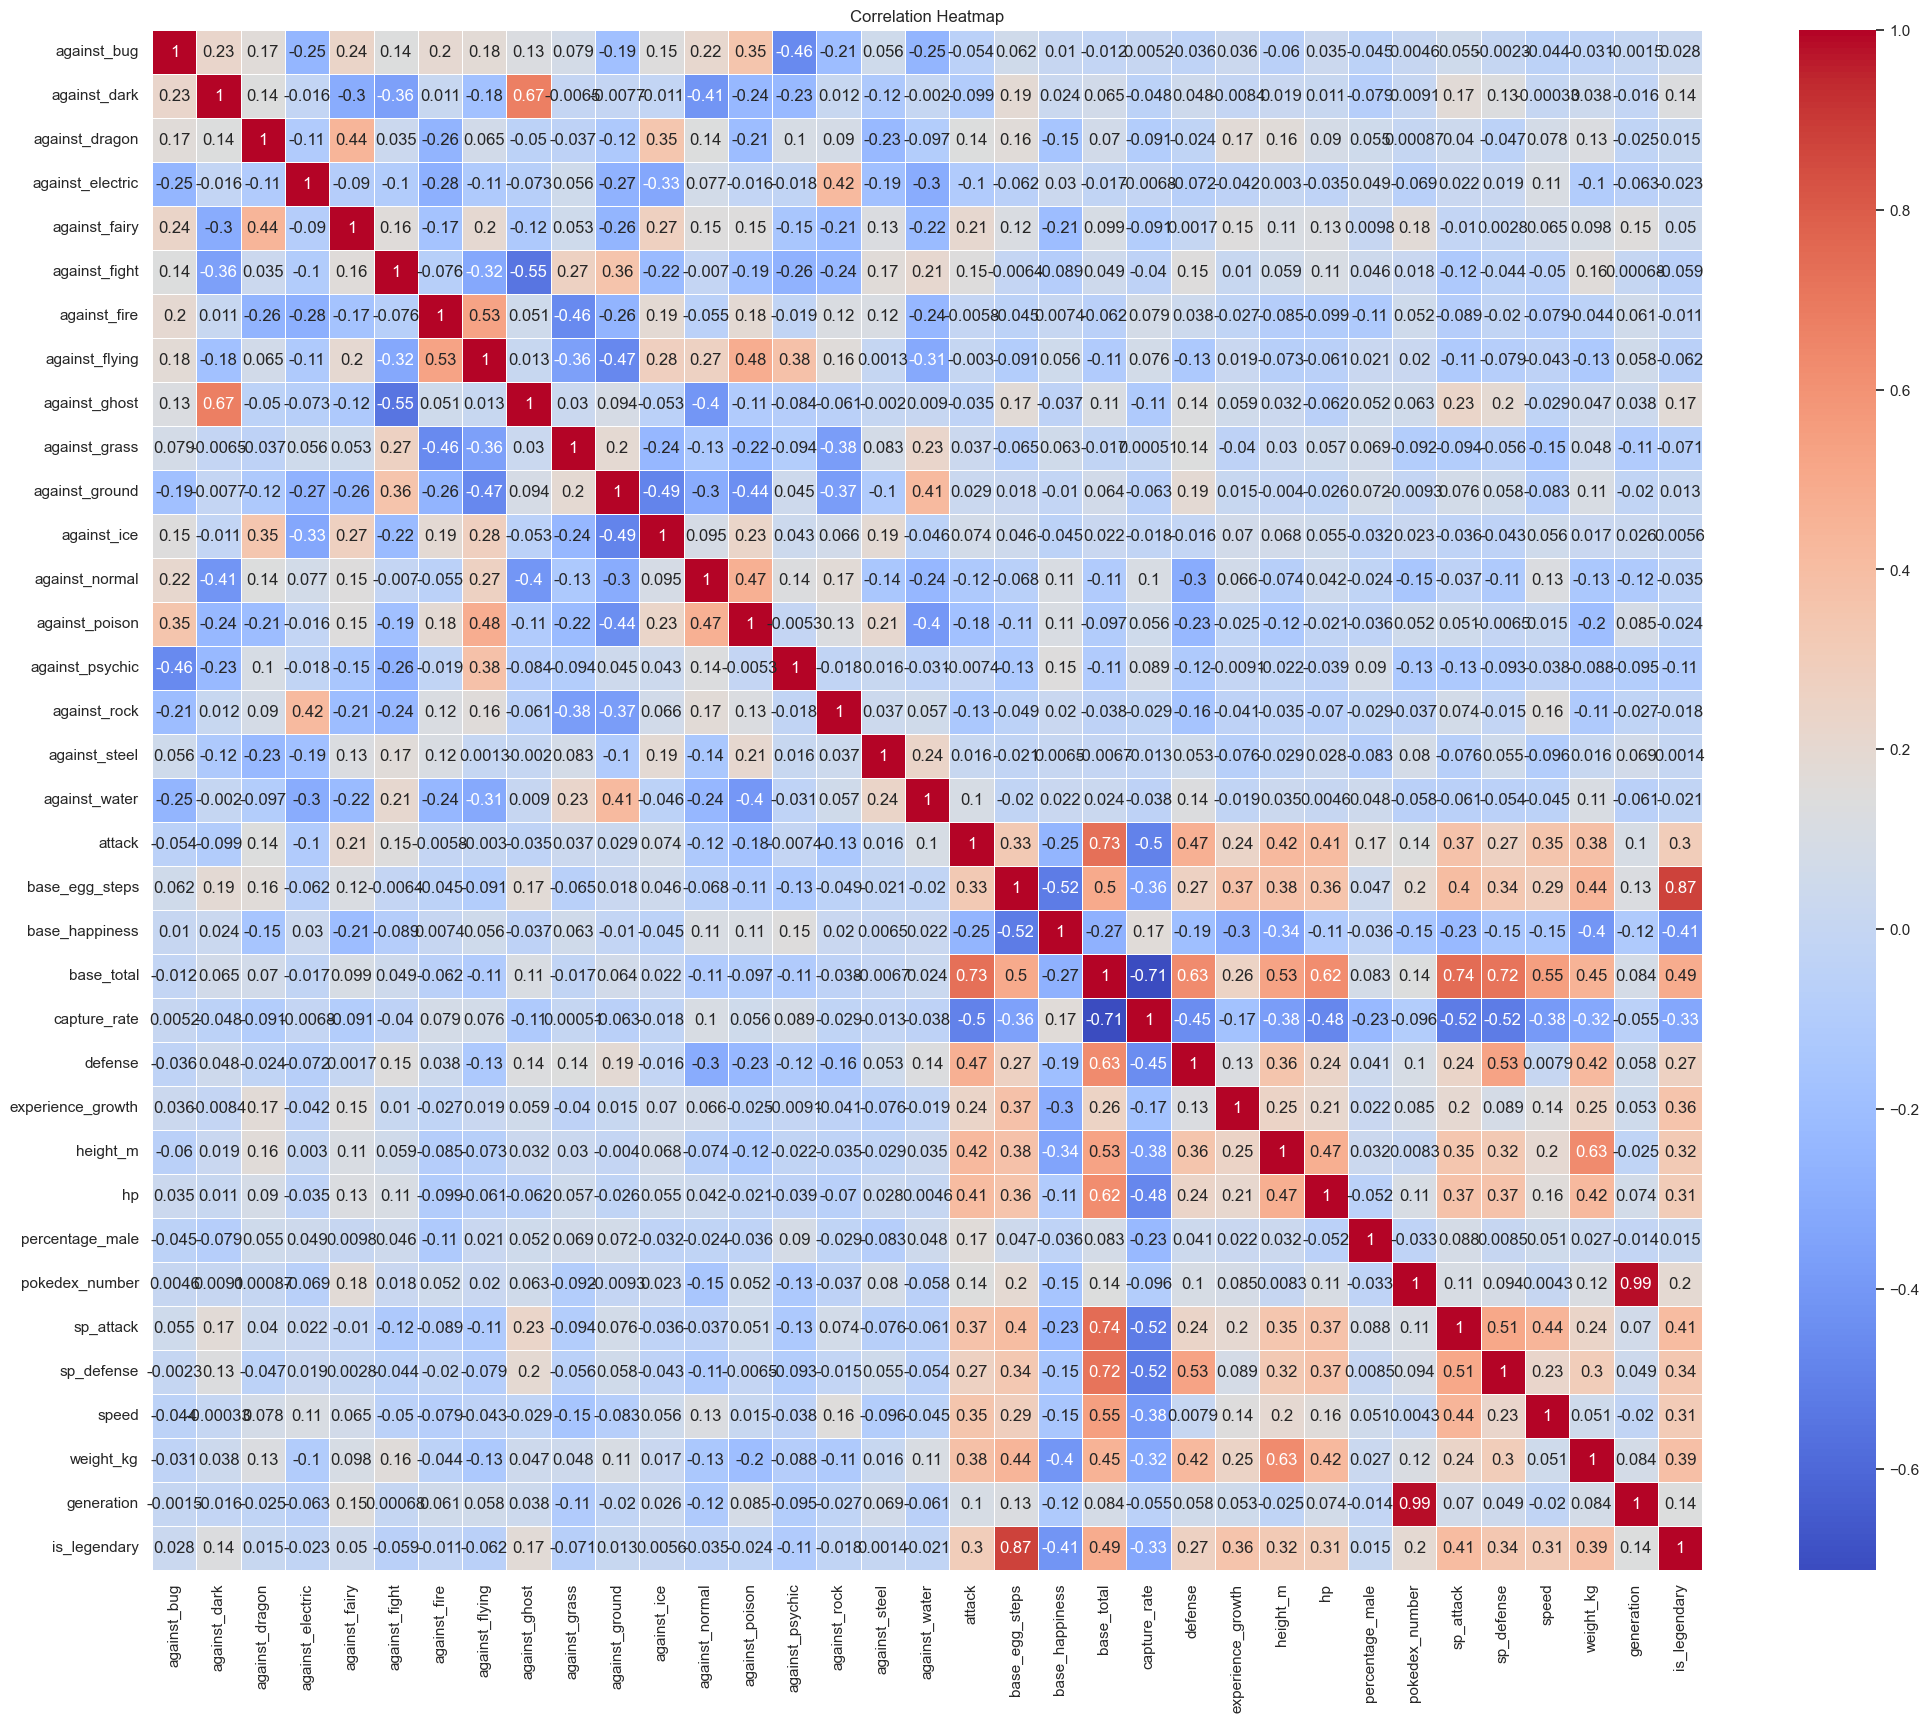

In [148]:
correlation_matrix = df1.corr(numeric_only=True)

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm', linewidths=0.5).set_title("Correlation Heatmap")
plt.show()

In [149]:
against=[]
rest=[]
for i in df.columns:
    if 'against' in i:
        against.append(i)
    else:
        rest.append(i)

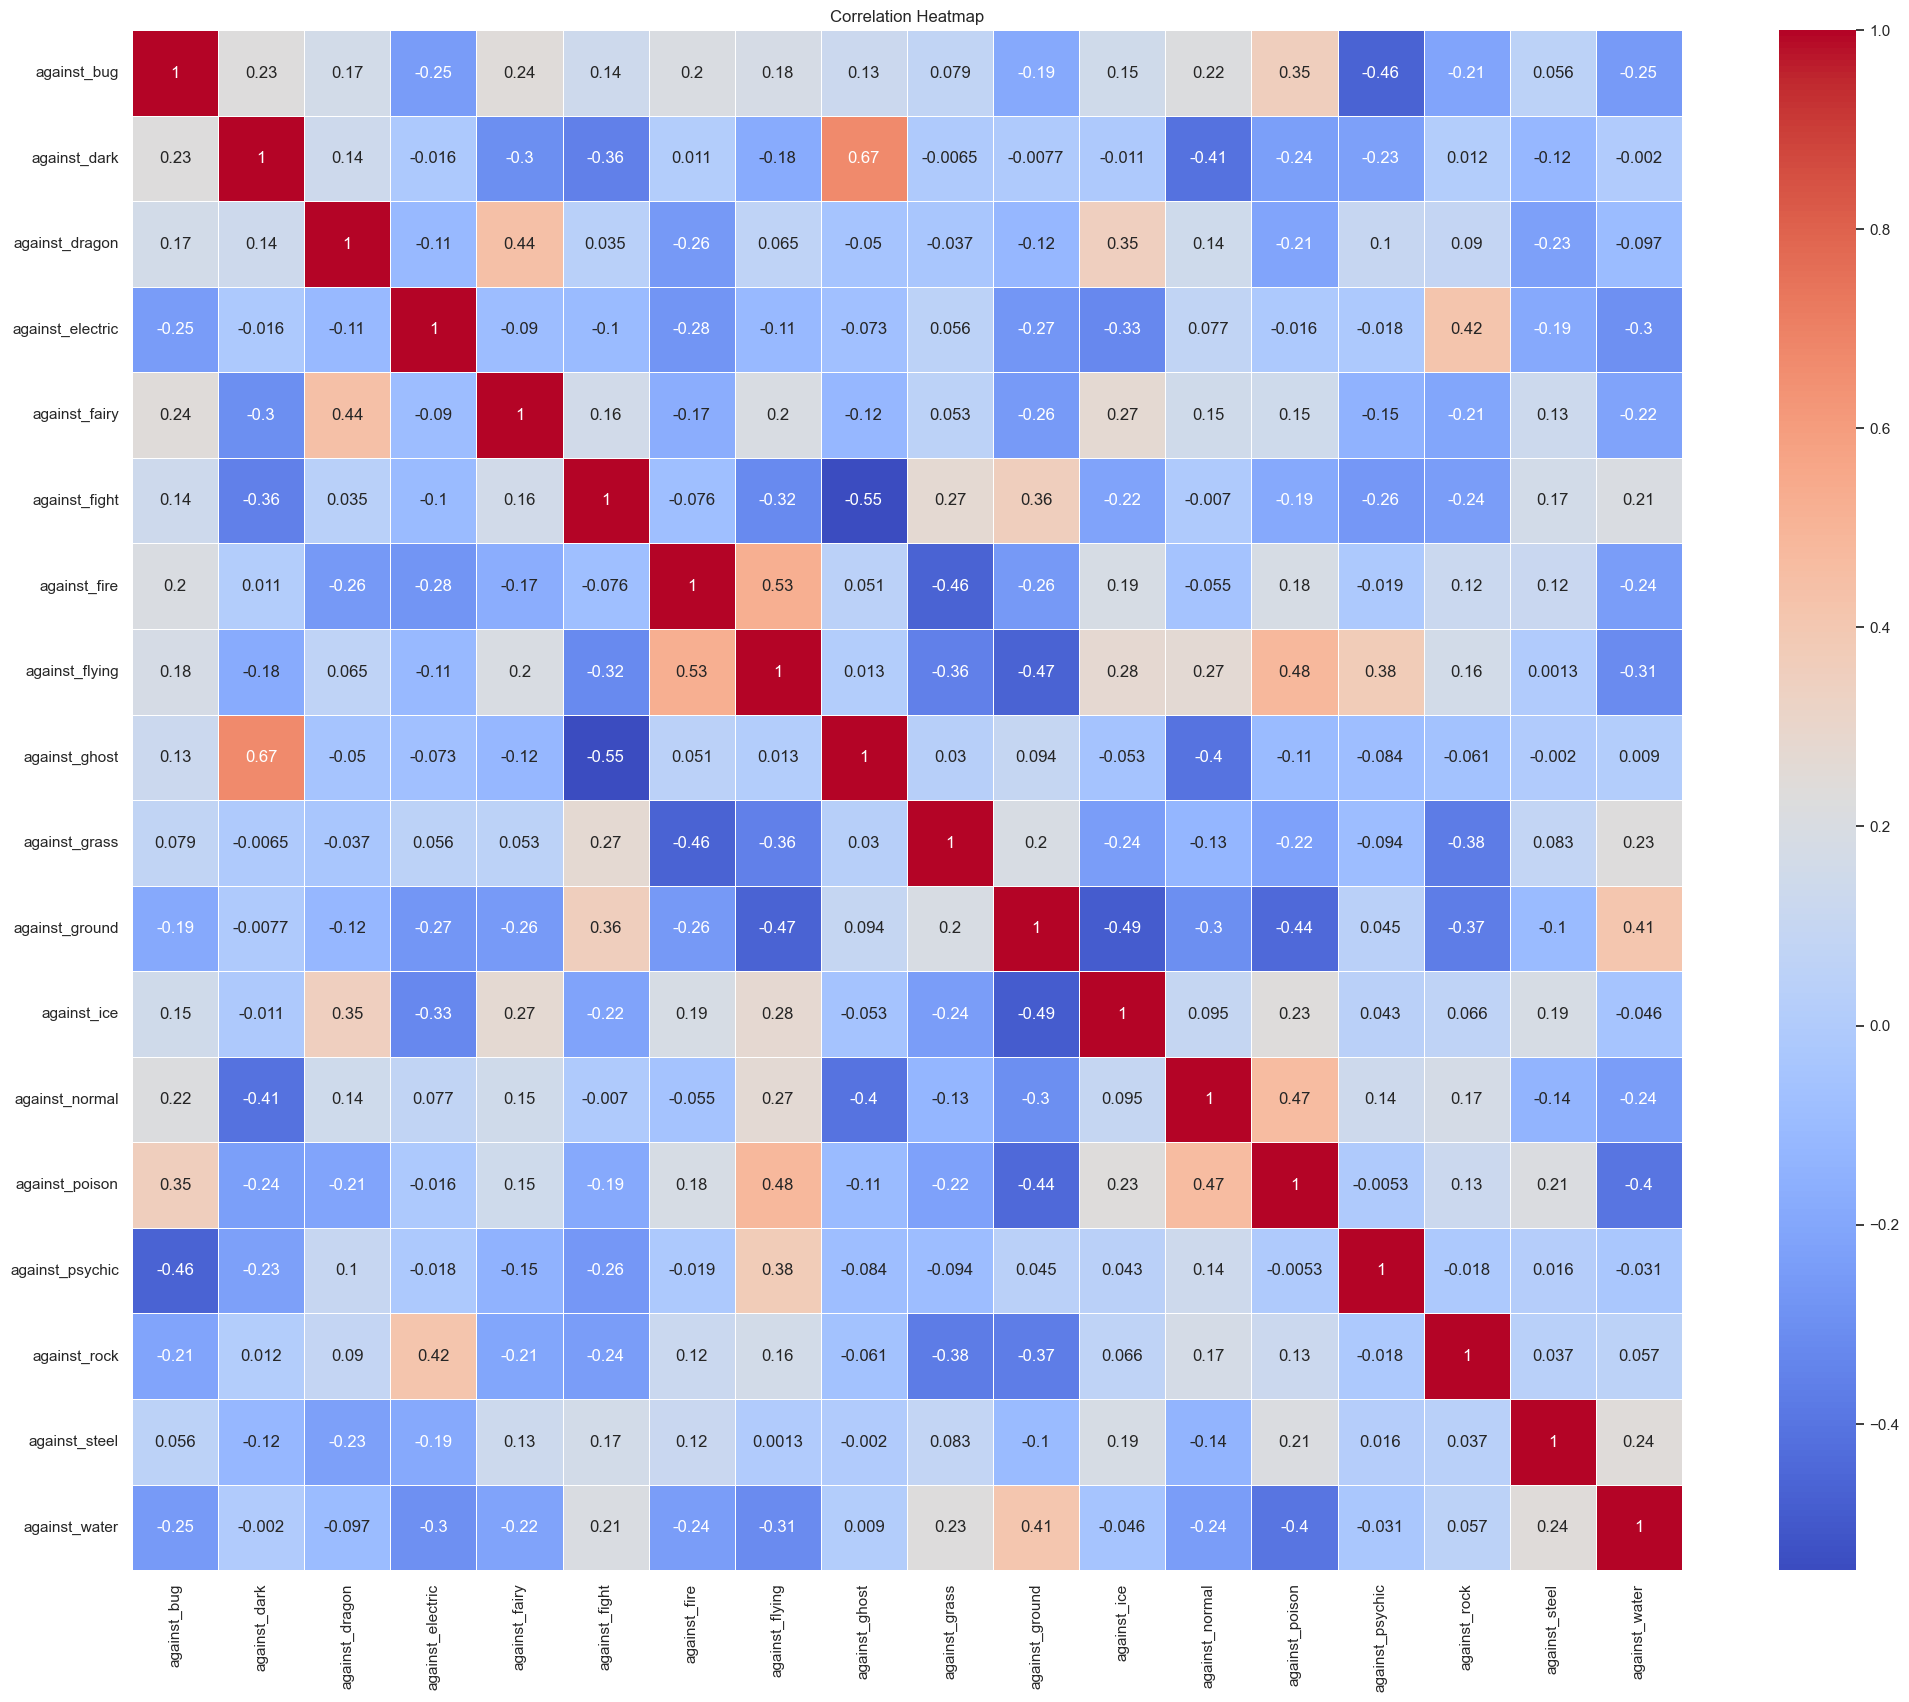

In [150]:
correlation_matrix = df1[against].corr(numeric_only=True)

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm', linewidths=0.5).set_title("Correlation Heatmap")
plt.show()

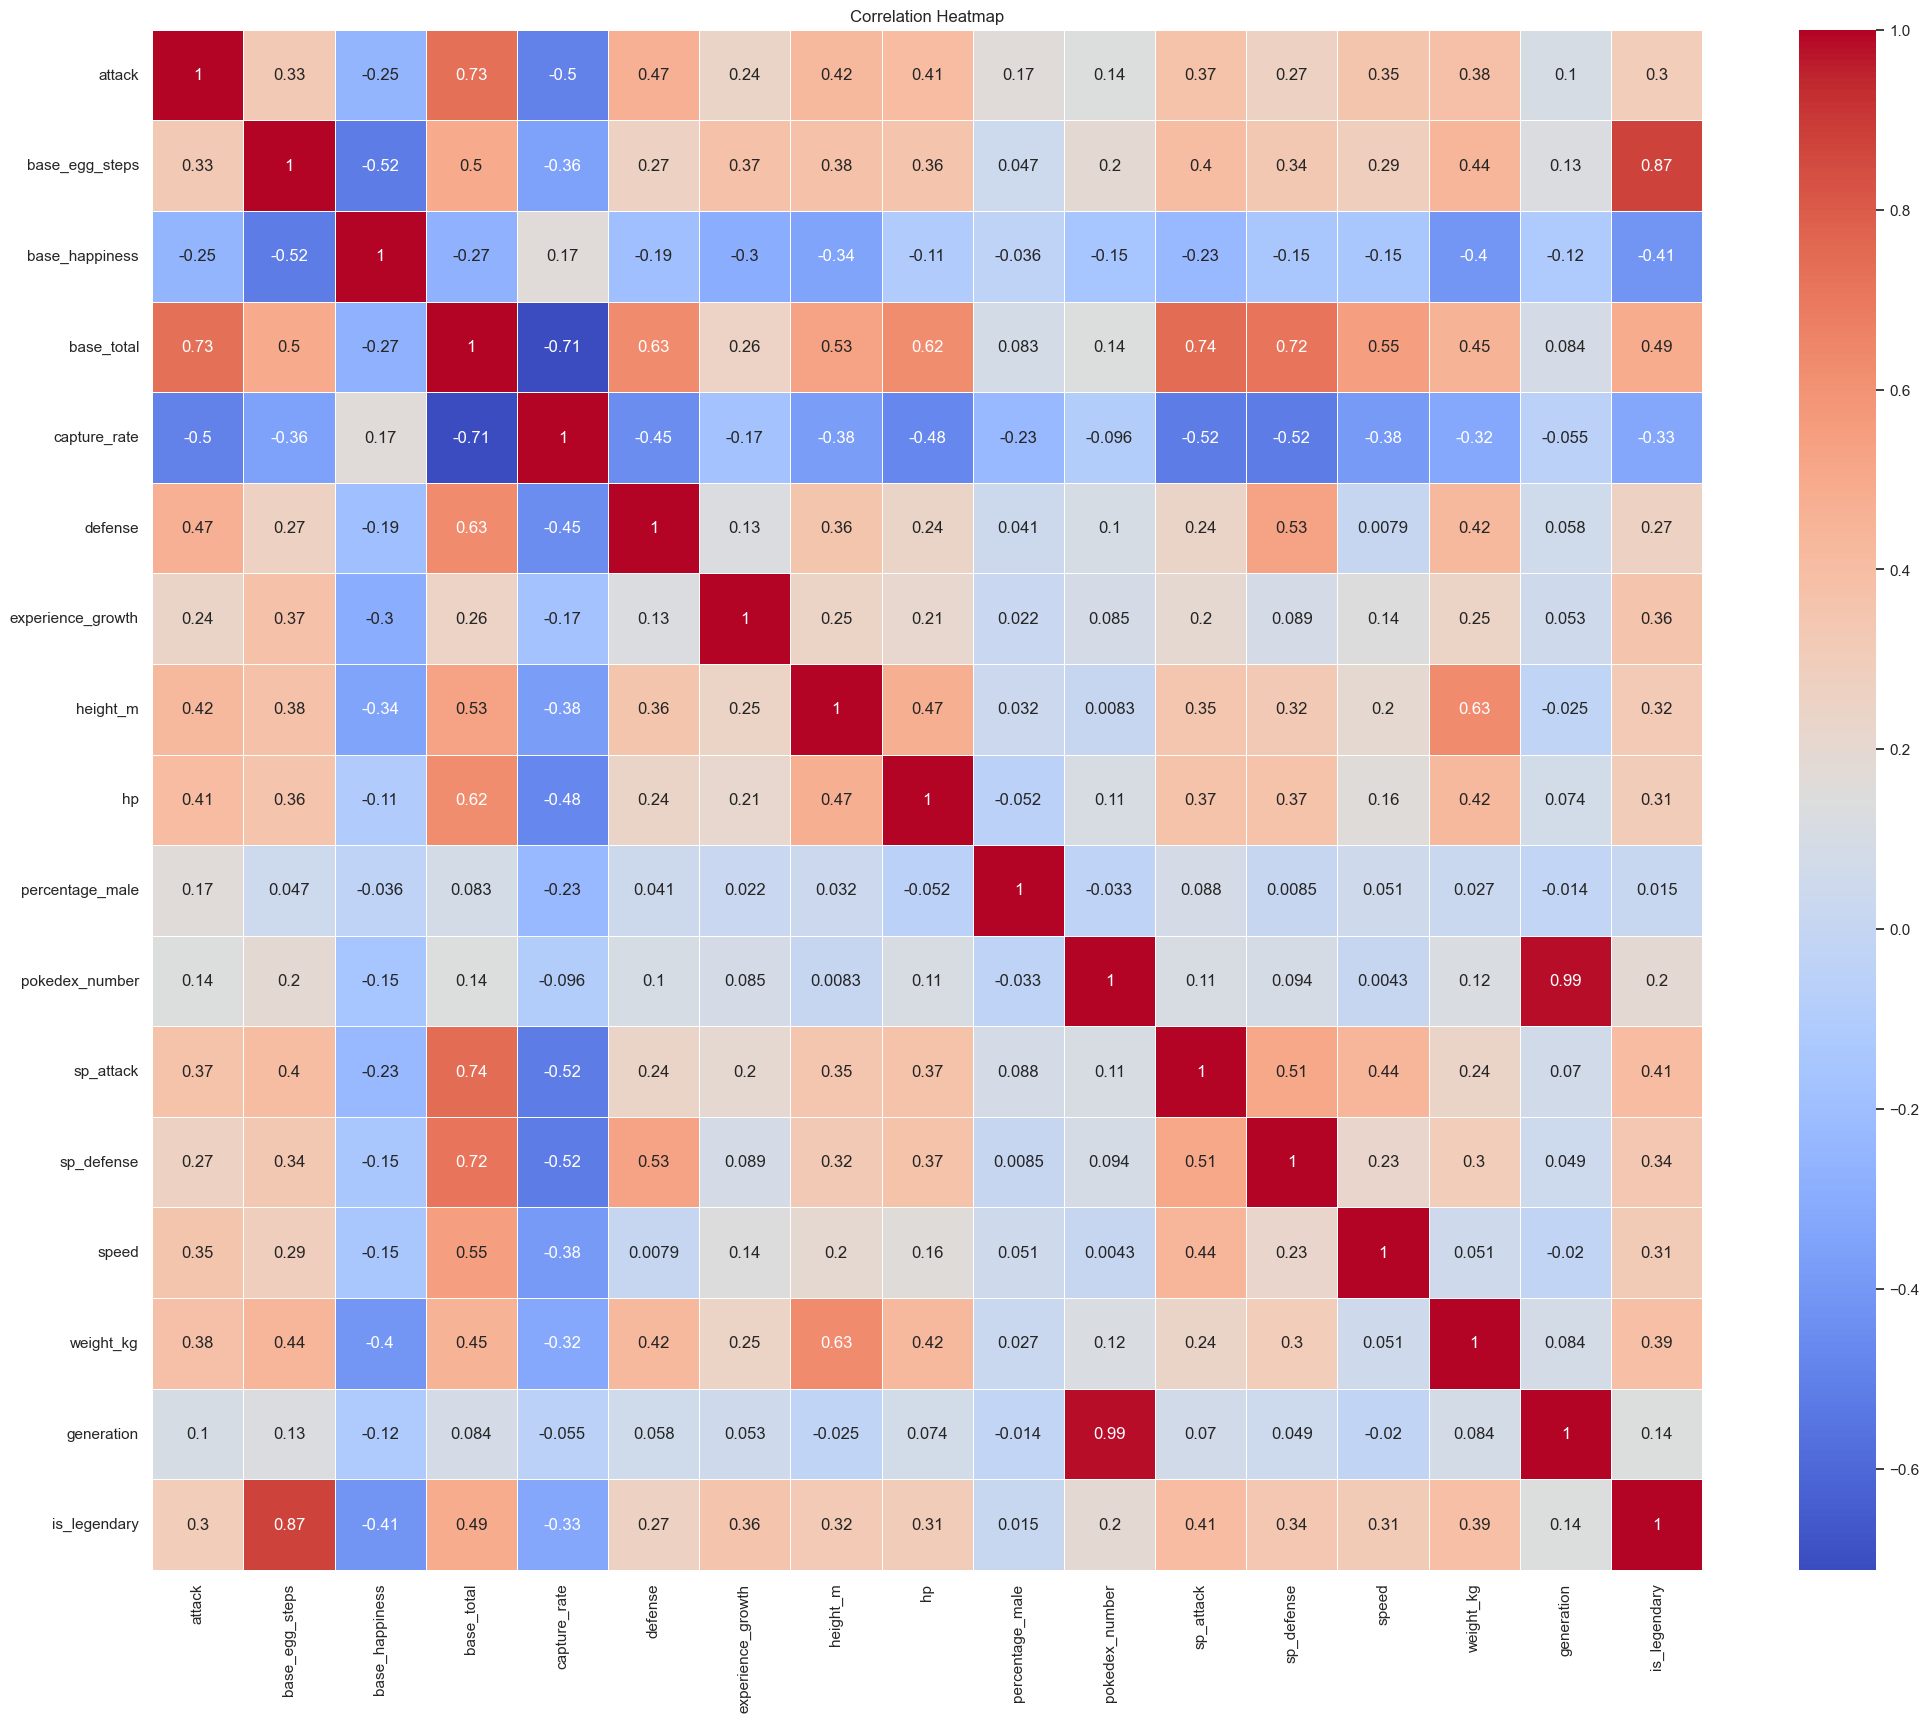

In [151]:
correlation_matrix = df1[rest].corr(numeric_only=True)

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm', linewidths=0.5).set_title("Correlation Heatmap")
plt.show()

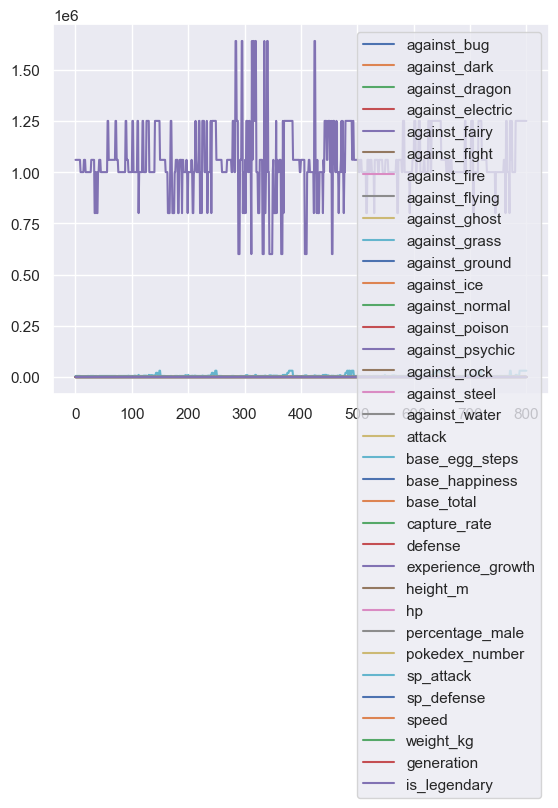

In [152]:
df1.plot()

plt.show()

### How many pokemon in each generation?

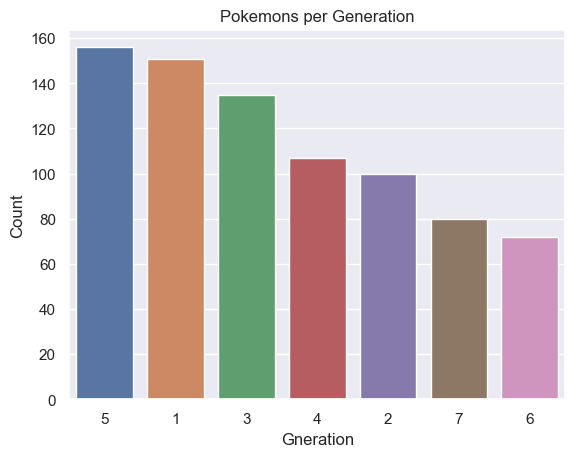

In [166]:
sns.countplot(data=df1, x='generation', order = df1.generation.value_counts().index)

# Add labels and title
plt.xlabel('Gneration')
plt.ylabel('Count')
plt.title('Pokemons per Generation')

# Show the plot
plt.show()

### How many pokemon use each primary type and secondry type ?

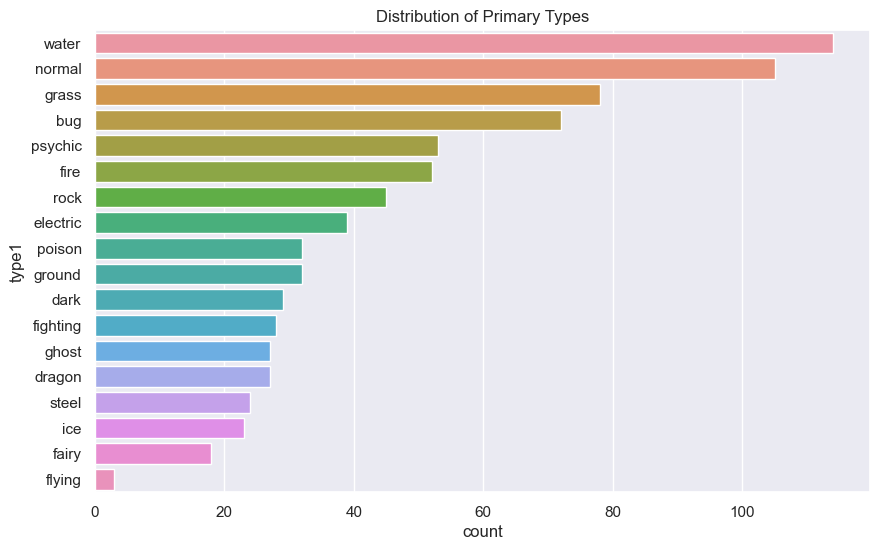

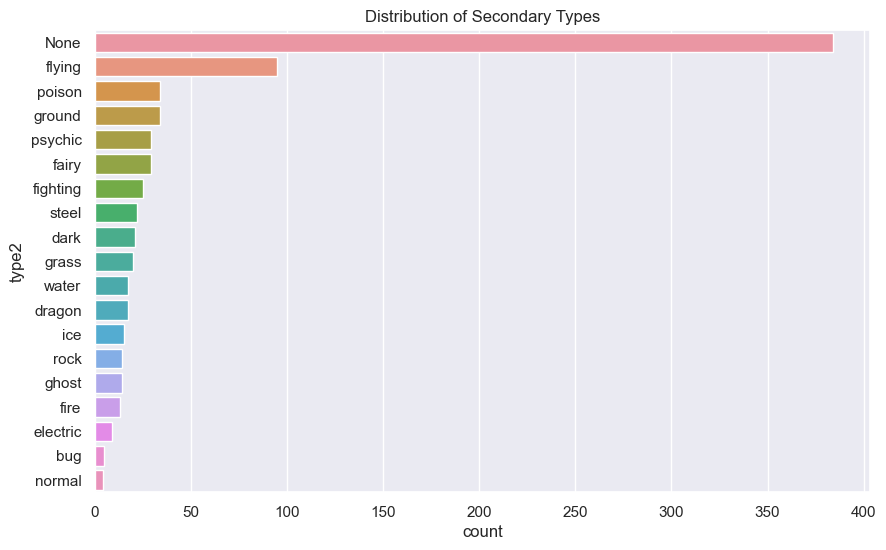

In [165]:
# Bar charts for primary type
plt.figure(figsize=(10, 6))
sns.countplot(y='type1', data=df1, order=df1['type1'].value_counts().index)
plt.title('Distribution of Primary Types')
plt.show()

# Bar charts for secondary type
plt.figure(figsize=(10, 6))
sns.countplot(y='type2', data=df1, order=df1['type2'].value_counts().index)
plt.title('Distribution of Secondary Types')
plt.show()

### How many legendary pokimon 

([<matplotlib.axis.XTick at 0x18ec8067150>,
 [Text(0, 0, 'Non-Legendary'), Text(1, 0, 'Legendary')])

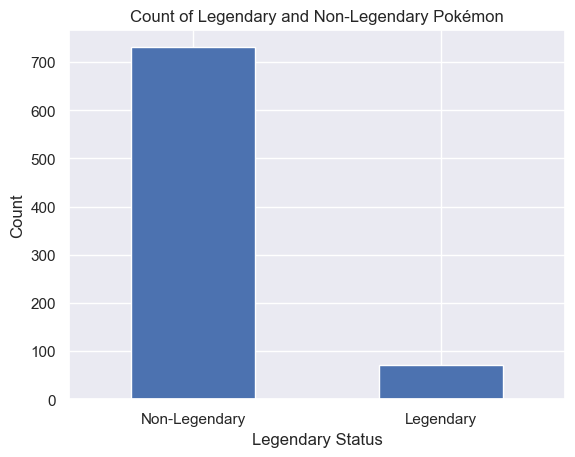

In [273]:
pd.value_counts(df1['is_legendary']).plot.bar()
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.title('Count of Legendary and Non-Legendary Pokémon')
plt.xticks(ticks=[0, 1], labels=['Non-Legendary', 'Legendary'], rotation=0)

### What is the most common type among legendary pokemons? 

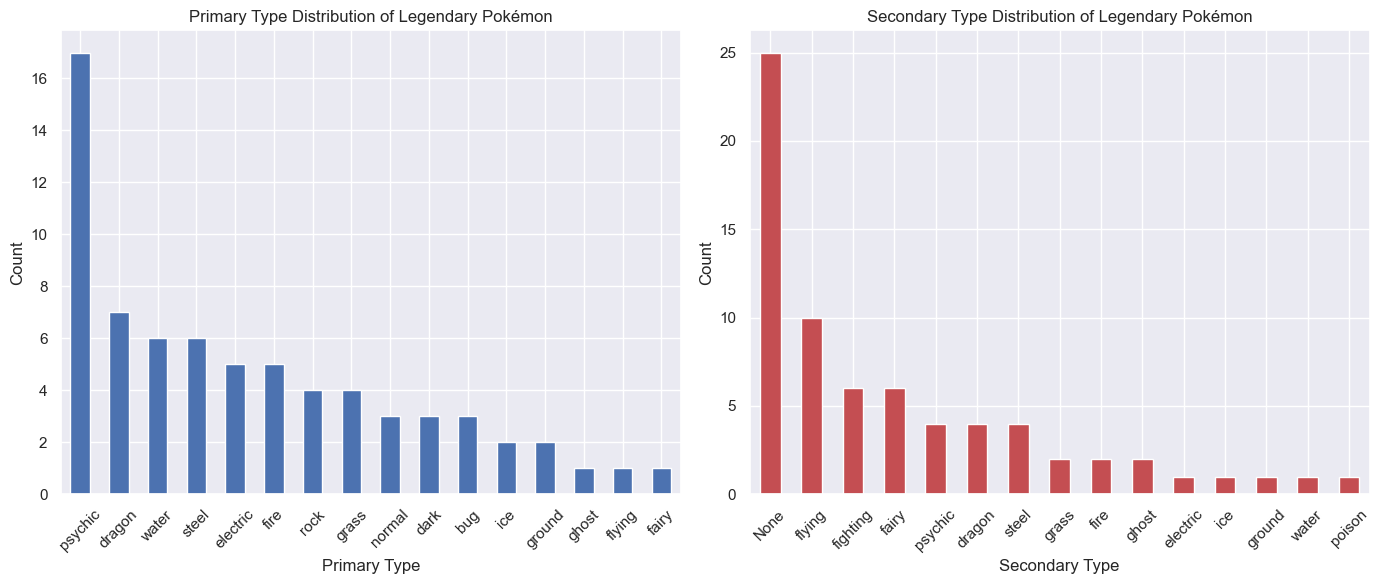

In [227]:
legendary_pokemon = df1[df1['is_legendary']==1]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

pd.value_counts(legendary_pokemon['type1']).plot.bar()

plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Primary Type Distribution of Legendary Pokémon')
plt.xticks(rotation=45)

# Plot the distribution of secondary types
plt.subplot(1, 2, 2)
pd.value_counts(legendary_pokemon['type2']).plot.bar(color="r")
plt.xlabel('Secondary Type')
plt.ylabel('Count')
plt.title('Secondary Type Distribution of Legendary Pokémon')
plt.xticks(rotation=45)
# Adjust layout
plt.tight_layout()
plt.show()

### Who is the top 10 strongest and weakest pokimons?

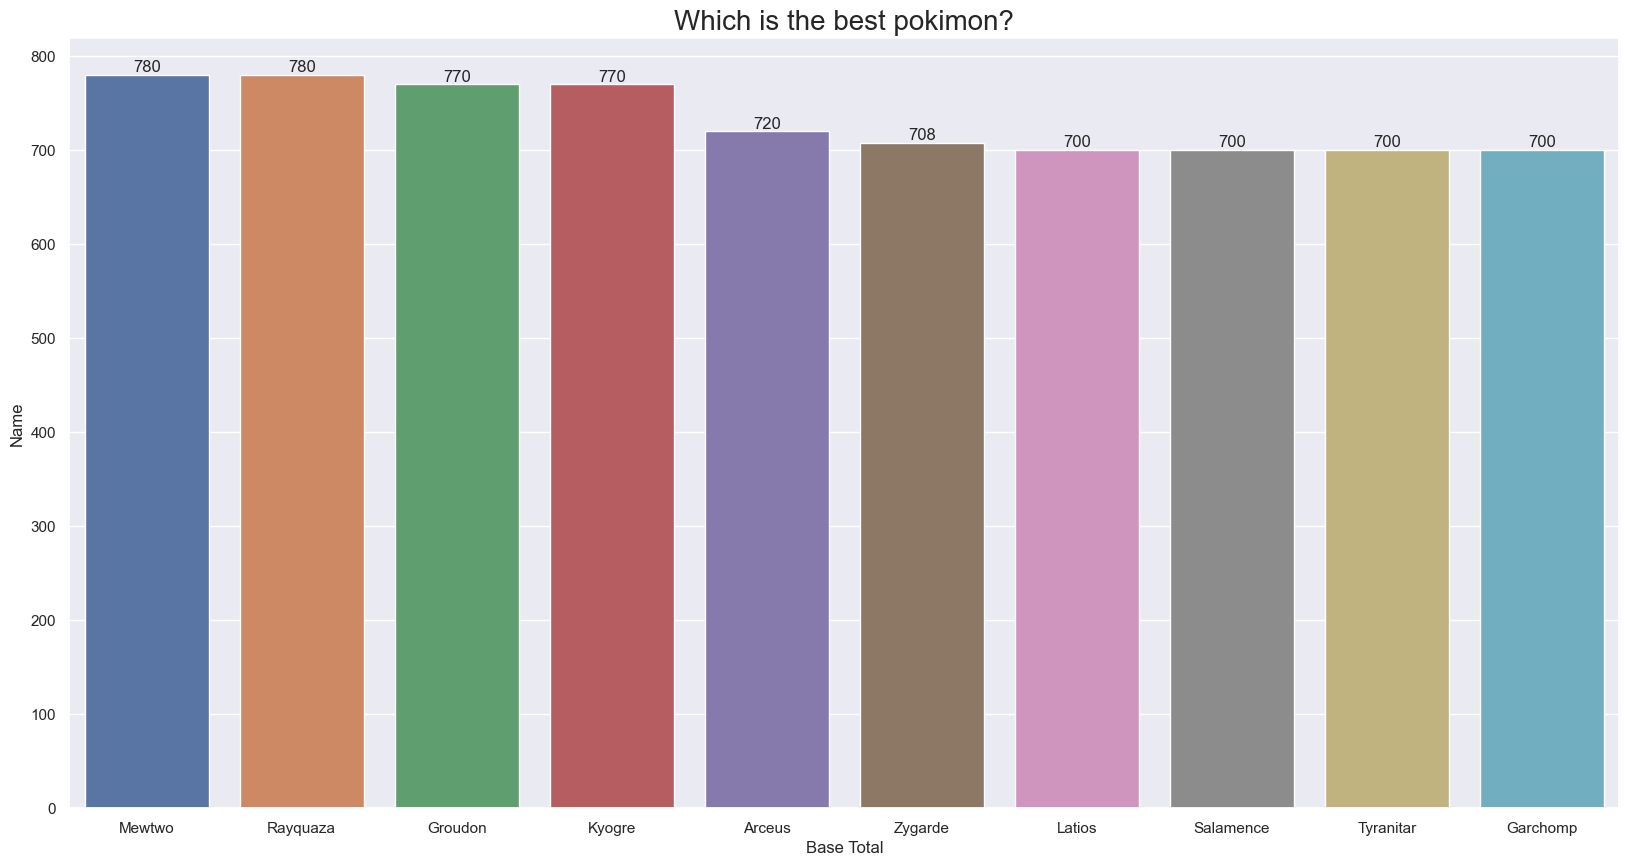

In [263]:
top10_pokemon_base_total = df1.sort_values(by="base_total", ascending=False).reset_index()[:10]
plt.figure(figsize=(20,10))
bar = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"])
bar.set_title("Which is the best pokimon?", size=20)
bar.set(xlabel="Base Total", ylabel="Name")
for index, value in enumerate(top10_pokemon_base_total['base_total']):
    plt.text(index, value, str(value), ha='center', va='bottom')

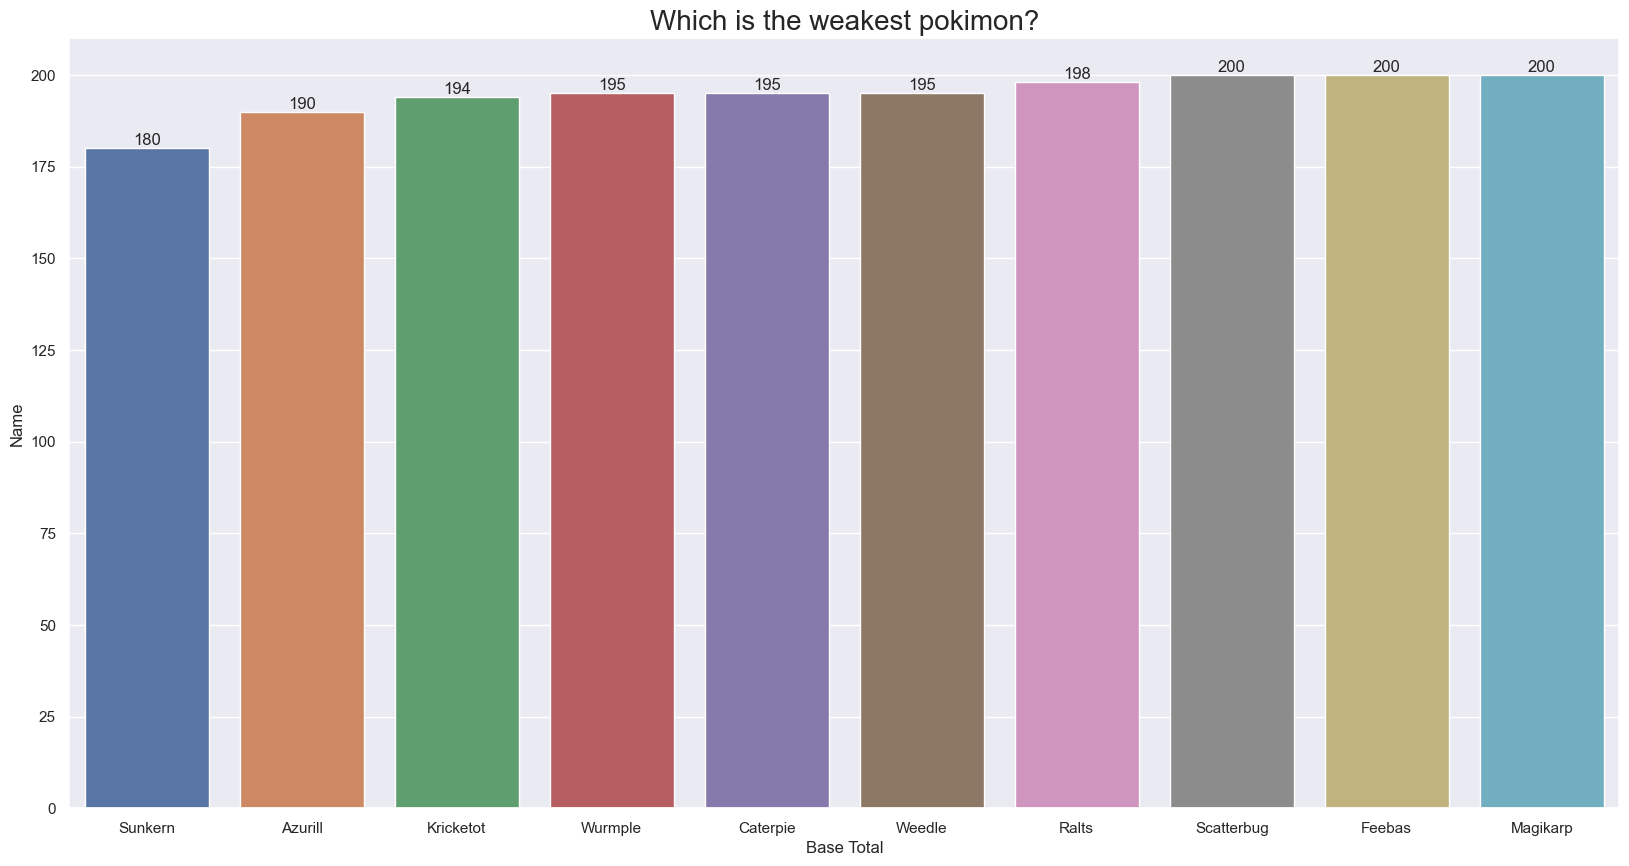

In [262]:
top10_pokemon_base_total = df1.sort_values(by="base_total", ascending=True).reset_index()[:10]
plt.figure(figsize=(20,10))
bar = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v')
bar.set_title("Which is the weakest pokimon?", size=20)
bar.set(xlabel="Base Total", ylabel="Name")
for index, value in enumerate(top10_pokemon_base_total['base_total']):
    plt.text(index, value, str(value), ha='center', va='bottom')

### How does speed, height and weight of a Pokemon correlate with its various base stats?

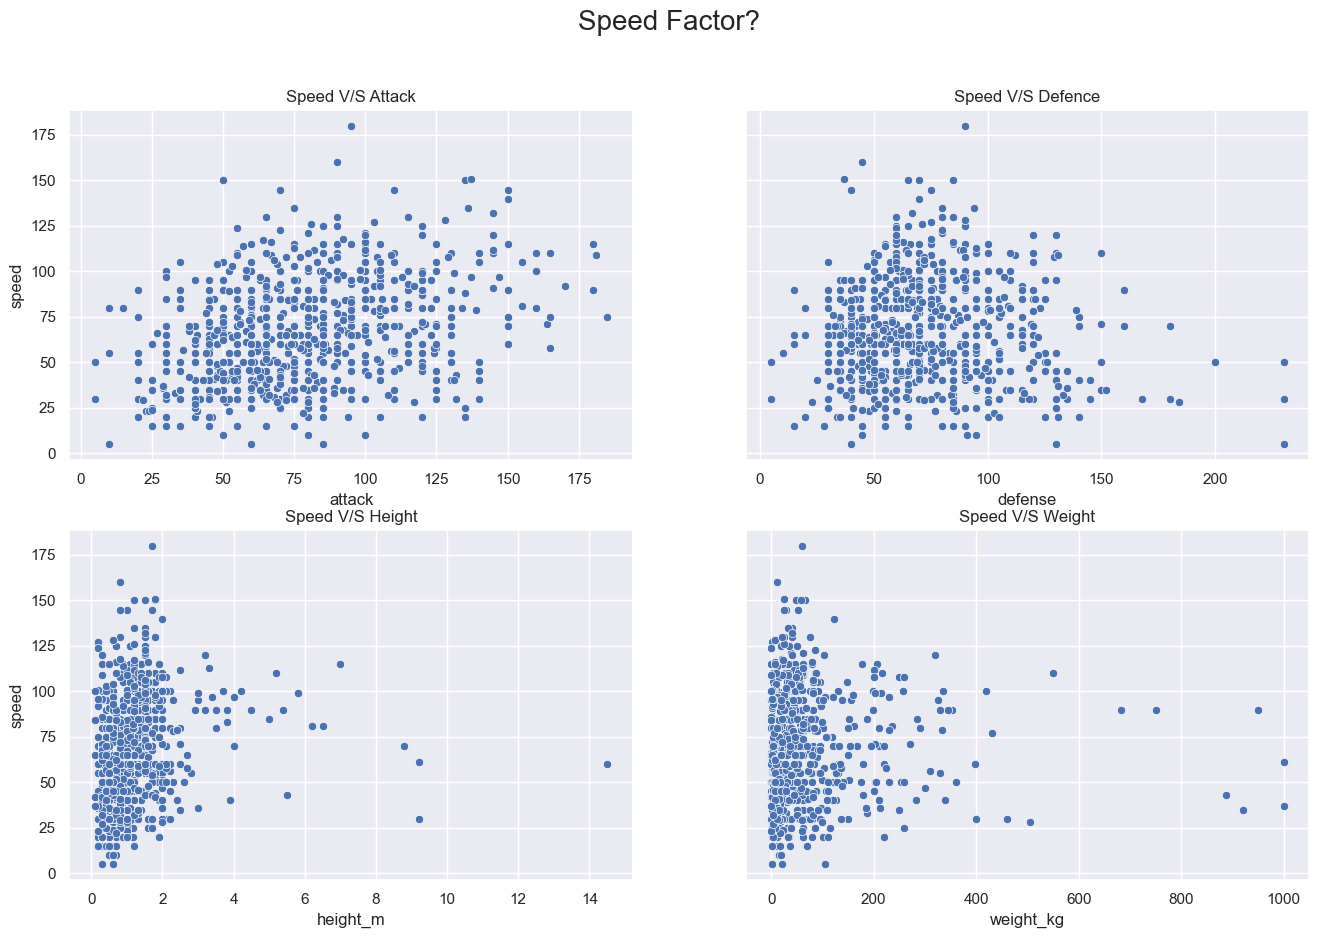

In [231]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x='attack', y='speed', data=df1,ax=axes[0,0])
axes[0,0].set_title("Speed V/S Attack")
sns.scatterplot(x='defense', y='speed', data=df1, ax=axes[0, 1])
axes[0,1].set_title("Speed V/S Defence")
sns.scatterplot(x='height_m', y='speed', data=df1, ax=axes[1, 0])
axes[1,0].set_title("Speed V/S Height")
sns.scatterplot(x='weight_kg', y='speed', data=df1, ax=axes[1, 1])
axes[1,1].set_title("Speed V/S Weight")
fig.suptitle("Speed Factor?", size=20)
plt.show()

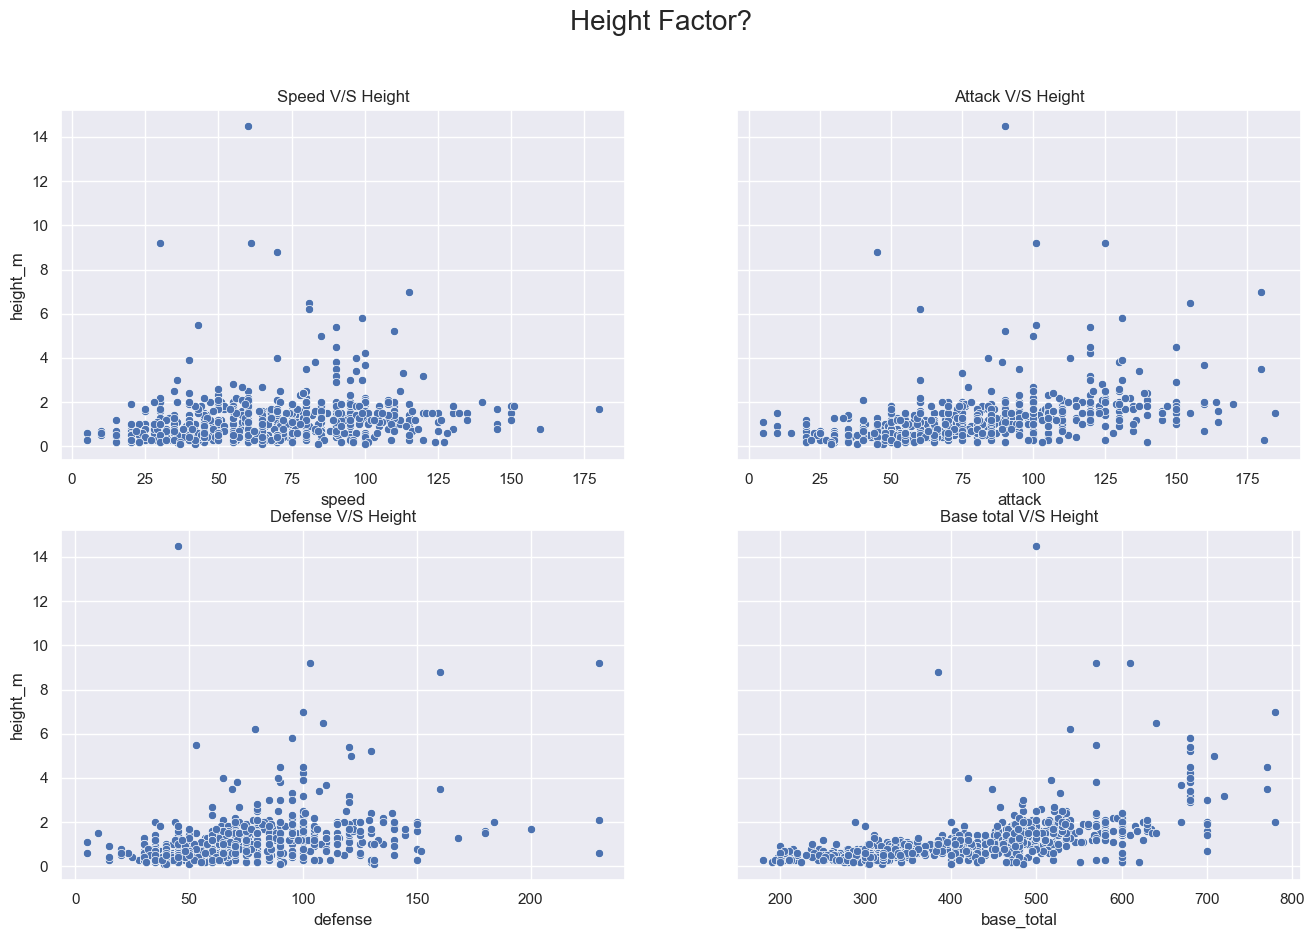

In [274]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x='speed', y='height_m', data=df,ax=axes[0,0])
axes[0,0].set_title("Speed V/S Height")
sns.scatterplot(x='attack', y='height_m', data=df, ax=axes[0, 1])
axes[0,1].set_title("Attack V/S Height")
sns.scatterplot(x='defense', y='height_m', data=df, ax=axes[1, 0])
axes[1,0].set_title("Defense V/S Height")
sns.scatterplot(x='base_total', y='height_m', data=df, ax=axes[1, 1])
axes[1,1].set_title("Base total V/S Height")
fig.suptitle("Height Factor?", size=20)
plt.show()

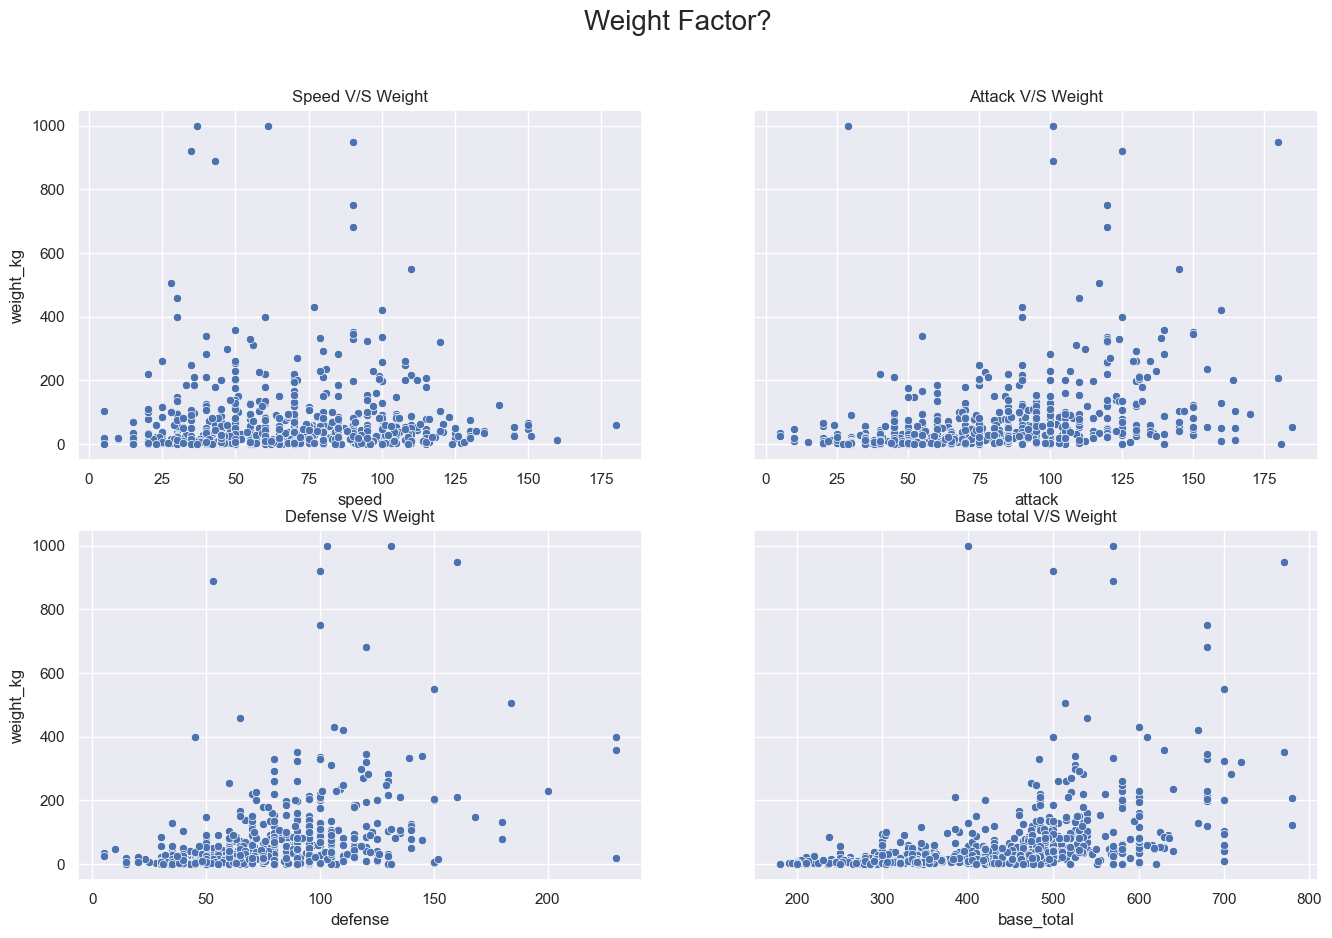

In [275]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x='speed', y='weight_kg', data=df,ax=axes[0,0])
axes[0,0].set_title("Speed V/S Weight")
sns.scatterplot(x='attack', y='weight_kg', data=df, ax=axes[0, 1])
axes[0,1].set_title("Attack V/S Weight")
sns.scatterplot(x='defense', y='weight_kg', data=df, ax=axes[1, 0])
axes[1,0].set_title("Defense V/S Weight")
sns.scatterplot(x='base_total', y='weight_kg', data=df, ax=axes[1, 1])
axes[1,1].set_title("Base total V/S Weight")
fig.suptitle("Weight Factor?", size=20)
plt.show()